### 패키지 선언

In [6]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Dataset 다운로드

In [7]:
# Training dataset 다운로드
mnist_train = dataset.MNIST(root = "./",
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
mnist_test = dataset.MNIST(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

## LeNet5 모델 정의
- Fully Connected Layer -> nn.Linear(in_features, out_features)
- Convolutional Layer -> nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
- ReLU -> nn.ReLU()
- Max Pooling -> nn.MaxPool2d(kernel_size, stride)


In [8]:
class LeNet5(nn.Module):

  def __init__(self):
    super(LeNet5, self).__init__()
    # 신경망 파라미터 초기화 (Conv 2개, FC 3개, ReLU, MaxPool)
    self.conv1 =nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
    self.relu = nn.ReLU()
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    
    self.conv2 =nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
    
    self.fc1 = nn.Linear(in_features=256,out_features=120)
    self.fc2 = nn.Linear(in_features=120,out_features=84)
    self.fc3 = nn.Linear(in_features=84,out_features=10)

  def forward(self, x):
    #-----------------------------------------------------------------
    # Convolution, MaxPool layer 추가 필요 (발표 자료 중 1~6번)
    y = self.conv1(x)
    y = self.relu(y)
    y = self.max_pool(y)
    
    y = self.conv2(y)
    y = self.relu(y)
    y = self.max_pool(y)
    #-----------------------------------------------------------------

    y = y.view(-1, 256) # feature map 평탄화

    #-----------------------------------------------------------------
    # Fully Connected layer 추가 필요 (발표 자료 중 8~12번)
    y= self.fc1(y)
    y =self.relu(y)
    
    y = self.fc2(y)
    y = self.relu(y)
    
    y = self.fc3(y)    
    #-----------------------------------------------------------------

    return y


## Hyper-parameters 지정

In [9]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = LeNet5()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## CNN 학습을 위한 반복문 선언

In [12]:
network.train()
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 0.078324
Epoch: 2 Loss = 0.057525
Epoch: 3 Loss = 0.047282
Epoch: 4 Loss = 0.040420
Epoch: 5 Loss = 0.034430
Epoch: 6 Loss = 0.030085
Epoch: 7 Loss = 0.025595
Epoch: 8 Loss = 0.022530
Epoch: 9 Loss = 0.020763
Epoch: 10 Loss = 0.018515
Epoch: 11 Loss = 0.016411
Epoch: 12 Loss = 0.014678
Epoch: 13 Loss = 0.013602
Epoch: 14 Loss = 0.012549
Epoch: 15 Loss = 0.009607
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [13]:
network.eval()
network = network.to('cpu')
img_test = mnist_test.data.float().unsqueeze(1)
label_test = mnist_test.targets

with torch.no_grad(): # test에서는 기울기 계산 제외
  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9897000193595886


## 예측 결과 확인

tensor([[-1661.1108,  -849.6483,   269.0048,  1205.7041, -2441.0349,   187.9032,
         -1551.8783, -2096.4990,  7852.9946, -1249.5203]])
tensor([8])


<function matplotlib.pyplot.show(close=None, block=None)>

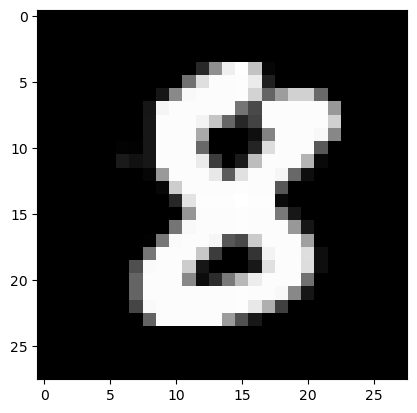

In [14]:
first_data = mnist_test.data[7776]

with torch.no_grad():
  prediction = network(first_data.float().unsqueeze(0))

prediction_num = torch.argmax(prediction, 1)

print(prediction)
print(prediction_num)
plt.imshow(first_data, cmap="gray")
plt.show